# General Assumptions and Import Statements
The aim of this use case is to analyse if there is a correlation between the economic welfare and migrational movement. The hypothesis is people are moving to places where welfare is higher.

In [14]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Import datenguidepy package

%cd ..
from datenguidepy.query_builder import Query, Field
from datenguidepy.query_execution import QueryExecutioner
from datenguidepy.output_transformer import QueryOutputTransformer
from datenguidepy.query_helper import get_all_regions

/Users/kristian/Daten/Sonstiges


# Fetch Data for the Bundesländer in Germany with Datenguidepy

In [16]:
# First get the region codes to query data from the Bundesländer.

region_codes = get_all_regions().query('level == "nuts1"').name
region_codes

id
10                  Saarland
11                    Berlin
12               Brandenburg
13    Mecklenburg-Vorpommern
14                   Sachsen
15            Sachsen-Anhalt
16                 Thüringen
01        Schleswig-Holstein
02                   Hamburg
03             Niedersachsen
04                    Bremen
05       Nordrhein-Westfalen
06                    Hessen
07           Rheinland-Pfalz
08         Baden-Württemberg
09                    Bayern
Name: name, dtype: object

In [17]:
# Create an empty DataFrame and append the results region by region.

results = pd.DataFrame()

for code,name in region_codes.iteritems():
    region_query = Query.region(code)
    region_query.add_field('BEVSTD') # population
    region_query.add_field('BEV085') # moving in administrative districts
    region_query.add_field('BEV086') # moving out administrative districts
    region_query.add_field('BIP804') # GDP per capita
    region_result = region_query.results()
    results = results.append(region_result, ignore_index=True)

# Preview the first data rows
    
results.head()

,id,name,year,BEV085,BEV086,BEVSTD,BIP804,BEV085_source_title_de,BEV085_source_valid_from,BEV085_source_periodicity,...,BEVSTD_source_title_de,BEVSTD_source_valid_from,BEVSTD_source_periodicity,BEVSTD_source_name,BEVSTD_source_url,BIP804_source_title_de,BIP804_source_valid_from,BIP804_source_periodicity,BIP804_source_name,BIP804_source_url
0,10,Saarland,1995,37146,34057,1084370,NaN,Wanderungsstatistik,1995-01-01T00:00:00,JAEHRLICH,...,Fortschreibung des Bevölkerungsstandes,1995-12-31T00:00:00,JAEHRLICH,12411,None,NaN,NaN,NaN,NaN,NaN
1,10,Saarland,1996,36742,34375,1084184,NaN,Wanderungsstatistik,1995-01-01T00:00:00,JAEHRLICH,...,Fortschreibung des Bevölkerungsstandes,1995-12-31T00:00:00,JAEHRLICH,12411,None,NaN,NaN,NaN,NaN,NaN
2,10,Saarland,1997,34529,35137,1080790,NaN,Wanderungsstatistik,1995-01-01T00:00:00,JAEHRLICH,...,Fortschreibung des Bevölkerungsstandes,1995-12-31T00:00:00,JAEHRLICH,12411,None,NaN,NaN,NaN,NaN,NaN
3,10,Saarland,1998,33691,36919,1074223,NaN,Wanderungsstatistik,1995-01-01T00:00:00,JAEHRLICH,...,Fortschreibung des Bevölkerungsstandes,1995-12-31T00:00:00,JAEHRLICH,12411,None,NaN,NaN,NaN,NaN,NaN
4,10,Saarland,1998,33691,36919,1074223,NaN,Wanderungsstatistik,1995-01-01T00:00:00,JAEHRLICH,...,Erhebung der öffentlichen Wasserversorgung,1998-01-01T00:00:00,JAEHRLICH,32211,None,NaN,NaN,NaN,NaN,NaN


In [18]:
# Calculate the net migration per 1000 inhabitants: (people movin in - people moving out) / population * 1000
results['migration'] = (results.BEV085 - results.BEV086) / results.BEVSTD * 1000

# A overview of the dataset:
results.describe()

,year,BEV085,BEV086,BEVSTD,BIP804,migration
count,480.000000,4.800000e+02,480.000000,4.800000e+02,384.000000,480.000000
mean,2006.233333,2.322014e+05,216986.570833,5.123158e+06,30758.578125,2.353212
std,6.511571,2.239660e+05,203941.735348,4.670409e+06,9664.302013,4.691635
min,1995.000000,2.570900e+04,26673.000000,6.521820e+05,16232.000000,-8.990454
25%,2001.000000,7.218600e+04,75555.250000,2.071050e+06,23846.750000,-0.496835
50%,2006.500000,1.297690e+05,123238.000000,3.107912e+06,28984.000000,2.186071
75%,2012.000000,3.230850e+05,306553.750000,6.626010e+06,35734.750000,5.014631
max,2017.000000,1.139705e+06,951614.000000,1.807969e+07,63927.000000,15.672517


# Create a Visualisation

[Text(0, 0.5, 'Net Migartion per 1000 Inhabitants'),
 Text(0.5, 0, 'Gross Domestic Product per Capita'),
 Text(0.5, 1.0, 'Migration and GDP')]

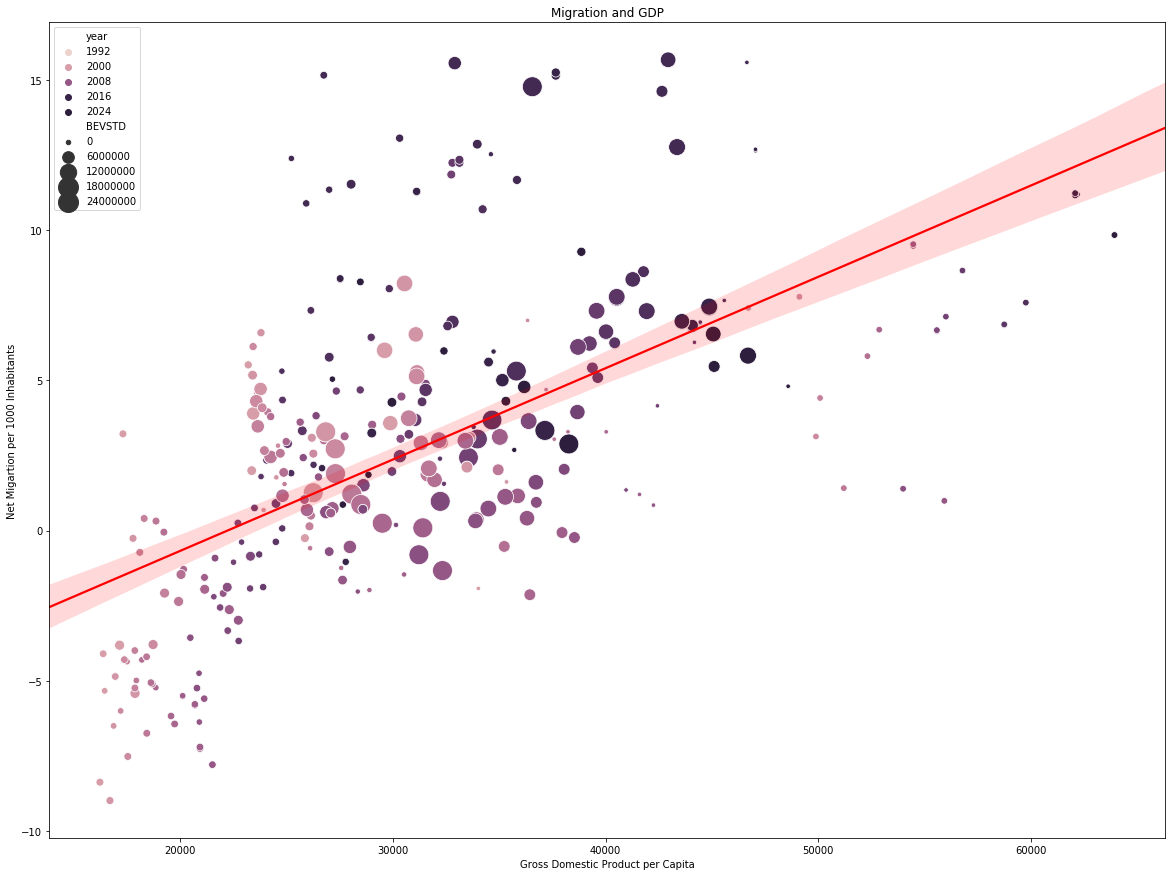

In [19]:
# Seaborn is used for a scatterplot of migration and GDP with year and population as additional informations
f, ax = plt.subplots(figsize=(20, 15))
g = sns.scatterplot(x="BIP804", y="migration", hue="year", size="BEVSTD", sizes=(20,400), data=results)
sns.regplot(x="BIP804", y="migration", data=results, scatter=False, color="red")
ax.set(xlabel='Gross Domestic Product per Capita', ylabel='Net Migartion per 1000 Inhabitants', title='Migration and GDP')

The analysis is based on data for all 16 Bundesländer in gemany from 1995 to 2017. Over the years GDP and migration increased. The plot shows a positive correlation between (net) migration and GDP in general.